In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('transfusion.csv')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
df.shape

(748, 5)

In [4]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

### is there a correlation between the features and the targets

In [5]:
target = 'whether he/she donated blood in March 2007'

df.corr()[target]

Recency (months)                             -0.279869
Frequency (times)                             0.218633
Monetary (c.c. blood)                         0.218633
Time (months)                                -0.035854
whether he/she donated blood in March 2007    1.000000
Name: whether he/she donated blood in March 2007, dtype: float64

 `Frequency` and `Monetary` seems to be correlated with 0.2 while `Time` and `Recency` is negatively correlated with the target
 
 ## Let investigate the correlation and then do some EDA

1. Let check the distribution of each features and the target (Univariate Analysis)
2. let see how they are with the target (Bivariate Analysis)
3. 

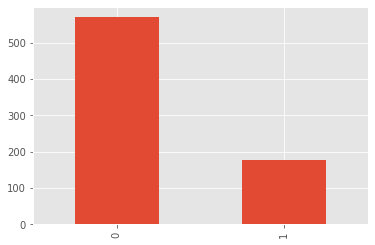

In [6]:
df[target].value_counts().plot(kind='bar')

looks like the data is imbalanced lots of selfish people everywhere lol..

In [7]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [8]:
df['Recency (months)'].value_counts()

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
12      6
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: Recency (months), dtype: int64

In [9]:
df['Frequency (times)'].value_counts()

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
10     14
12     14
16     13
14     13
13      9
15      6
17      4
24      3
19      2
20      2
21      2
22      2
46      1
18      1
23      1
26      1
33      1
34      1
38      1
41      1
43      1
44      1
50      1
Name: Frequency (times), dtype: int64

In [10]:
df['Monetary (c.c. blood)'].value_counts()

250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
2500      14
3000      14
4000      13
3500      13
3250       9
3750       6
4250       4
6000       3
4750       2
5250       2
5500       2
5000       2
8250       1
12500      1
9500       1
11500      1
5750       1
8500       1
6500       1
4500       1
11000      1
10750      1
10250      1
Name: Monetary (c.c. blood), dtype: int64

In [11]:
df['Time (months)'].value_counts()

4     57
16    51
14    44
2     36
23    36
      ..
13     1
12     1
65     1
36     1
3      1
Name: Time (months), Length: 78, dtype: int64

(array([187., 169.,  19.,  26.,  93.,  81.,  66.,   2.,  46.,  50.,   2.,
          0.,   0.,   0.,   1.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 0.        ,  2.46666667,  4.93333333,  7.4       ,  9.86666667,
        12.33333333, 14.8       , 17.26666667, 19.73333333, 22.2       ,
        24.66666667, 27.13333333, 29.6       , 32.06666667, 34.53333333,
        37.        , 39.46666667, 41.93333333, 44.4       , 46.86666667,
        49.33333333, 51.8       , 54.26666667, 56.73333333, 59.2       ,
        61.66666667, 64.13333333, 66.6       , 69.06666667, 71.53333333,
        74.        ]),
 <a list of 30 Patch objects>)

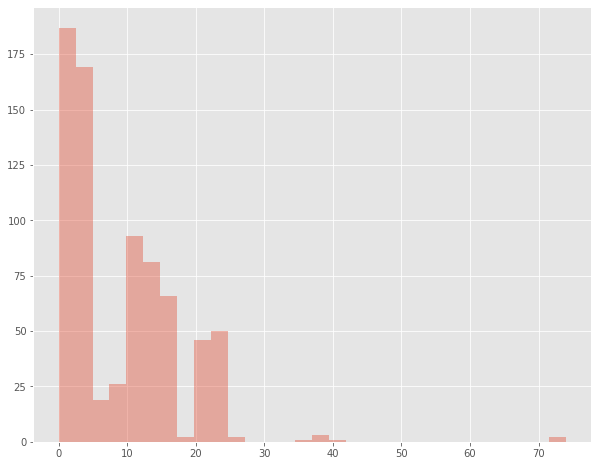

In [12]:
plt.figure(figsize = [10, 8])
plt.hist(df['Recency (months)'], bins=30, alpha=.4)

looks like the data is skewed and there may be outliers <br> let find out to clear any doubt

In [13]:
df['Recency (months)'].describe()

count    748.000000
mean       9.506684
std        8.095396
min        0.000000
25%        2.750000
50%        7.000000
75%       14.000000
max       74.000000
Name: Recency (months), dtype: float64

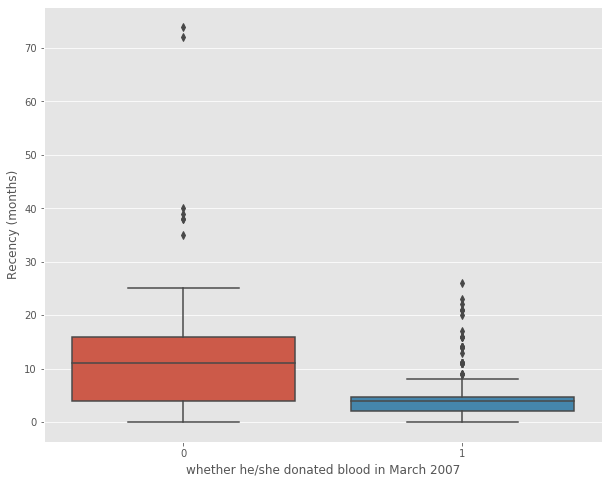

In [14]:
plt.figure(figsize = [10, 8])

sns.boxplot(data=df, x=target, y='Recency (months)')

It is clear now that there is an outlier and the person didnt give blood which means we can remove him or her <br>
we are not removing because he didnt donate but because it is an outlier it is so far from the other values and it will influence our model the way we dont want.

maybe we should explore more but note that there is an outlier in that features and that the essence of the ***EDA*** we doing

(array([270., 149.,  62.,  95.,  55.,  14.,  36.,  22.,   6.,  17.,   1.,
          4.,   4.,   1.,   3.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,
          1.,   0.,   1.,   1.,   1.,   1.,   0.,   1.]),
 array([  250.        ,   658.33333333,  1066.66666667,  1475.        ,
         1883.33333333,  2291.66666667,  2700.        ,  3108.33333333,
         3516.66666667,  3925.        ,  4333.33333333,  4741.66666667,
         5150.        ,  5558.33333333,  5966.66666667,  6375.        ,
         6783.33333333,  7191.66666667,  7600.        ,  8008.33333333,
         8416.66666667,  8825.        ,  9233.33333333,  9641.66666667,
        10050.        , 10458.33333333, 10866.66666667, 11275.        ,
        11683.33333333, 12091.66666667, 12500.        ]),
 <a list of 30 Patch objects>)

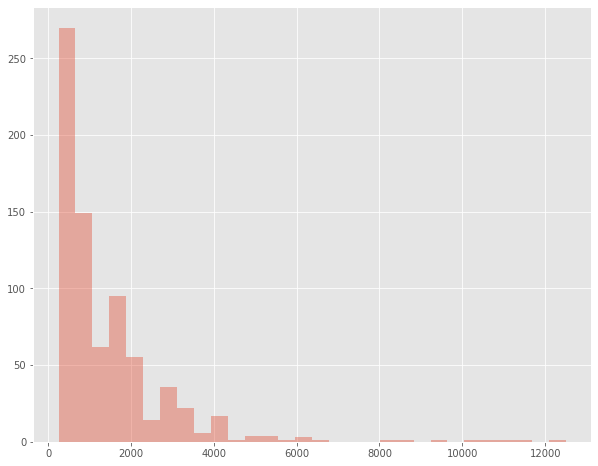

In [15]:
plt.figure(figsize = [10, 8])
plt.hist(df['Monetary (c.c. blood)'], bins=30, alpha=.4)

In [16]:
df['Monetary (c.c. blood)'].describe()

count      748.000000
mean      1378.676471
std       1459.826781
min        250.000000
25%        500.000000
50%       1000.000000
75%       1750.000000
max      12500.000000
Name: Monetary (c.c. blood), dtype: float64

(array([158.,   0.,   0.,   0.,   0., 112.,   0.,   0.,  87.,   0.,  62.,
          0.,  62.,  52.,  43.,  31.,  24.,  14.,  22.,  23.,  19.,  17.,
          5.,   4.,   5.,   0.,   1.,   2.,   2.,   3.]),
 array([5.52146092, 5.65186168, 5.78226245, 5.91266322, 6.04306399,
        6.17346475, 6.30386552, 6.43426629, 6.56466705, 6.69506782,
        6.82546859, 6.95586935, 7.08627012, 7.21667089, 7.34707165,
        7.47747242, 7.60787319, 7.73827395, 7.86867472, 7.99907549,
        8.12947625, 8.25987702, 8.39027779, 8.52067856, 8.65107932,
        8.78148009, 8.91188086, 9.04228162, 9.17268239, 9.30308316,
        9.43348392]),
 <a list of 30 Patch objects>)

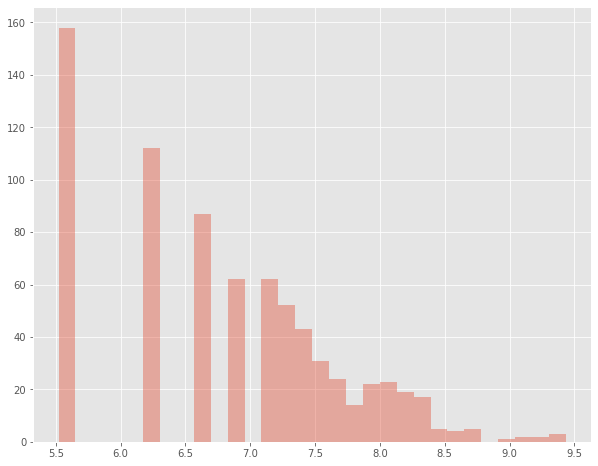

In [17]:
plt.figure(figsize = [10, 8])
plt.hist(np.log(df['Monetary (c.c. blood)']), bins=30, alpha=.4) 

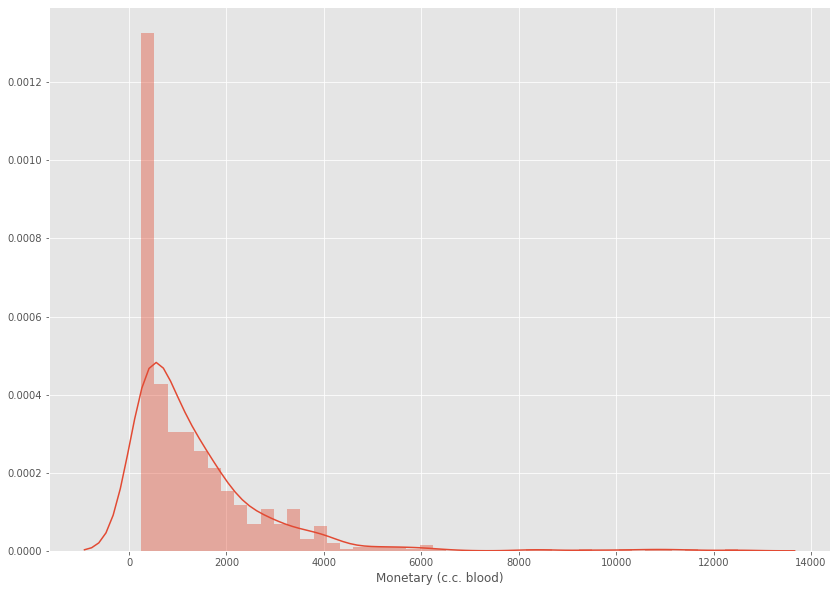

In [18]:
plt.figure(figsize=[14,10])
sns.distplot(df['Monetary (c.c. blood)'])

In [19]:
# Normalize the feature by taking the log 
df['Monetary (c.c. blood)'] = np.log(df['Monetary (c.c. blood)'])
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,9.433484,98,1
1,0,13,8.086410,28,1
2,1,16,8.294050,35,1
3,2,20,8.517193,45,1
4,1,24,8.699515,77,0


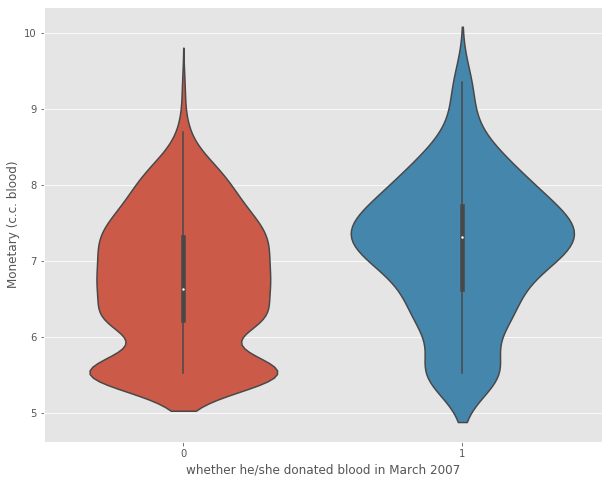

In [20]:
plt.figure(figsize=[10,8])
sns.violinplot(data=df, x=target, y='Monetary (c.c. blood)')

So the feature is nice and properly distributed as the shape came out well <br>
What this means is that the fat sides of the violin is where most of the data is concentrated and according to the shape it pretty nice shape . 
## I dont know what you are thinking oo but that blue shape ehmmm

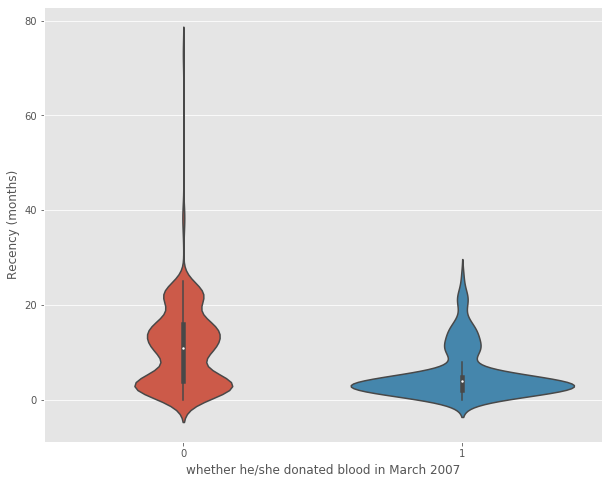

In [21]:
plt.figure(figsize=[10,8])
sns.violinplot(data=df, x=target, y='Recency (months)')

You can clearly see the Outlier here so we can remove it now

In [22]:
df_ = df[df['Recency (months)'] < 50]
print('New Shape Before Removing Outlier ', df.shape)
print('New Shape After Removing Outlier ', df_.shape)

New Shape Before Removing Outlier  (748, 5)
New Shape After Removing Outlier  (746, 5)


## <color>Can somebody shout i love Code more than my BAE that if you have a BAE lol..

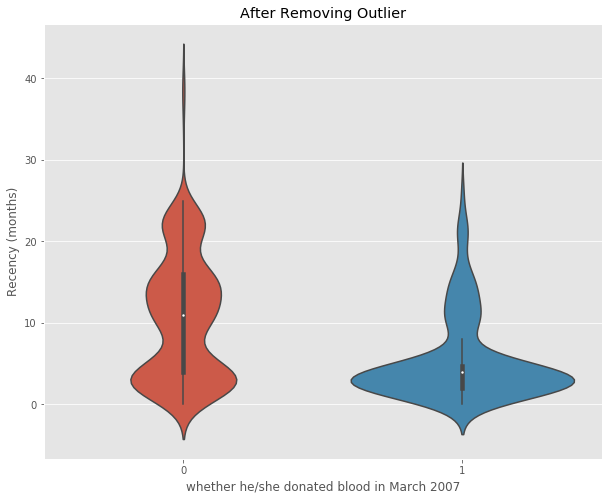

In [23]:
plt.figure(figsize=[10,8])
plt.title('After Removing Outlier')
sns.violinplot(data=df_, x=target, y='Recency (months)')

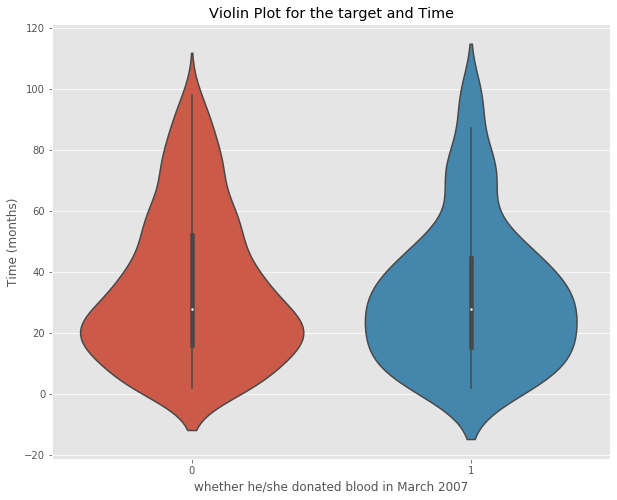

In [24]:
plt.figure(figsize=[10,8])
plt.title('Violin Plot for the target and Time')
sns.violinplot(data=df_, x=target, y='Time (months)')

## SO after EDA and preprocessing let start model building

Shall we 

In [25]:
df_.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
742,16,3,6.620073,86,0
743,23,2,6.214608,38,0
744,21,2,6.214608,52,0
745,23,3,6.620073,62,0
746,39,1,5.521461,39,0


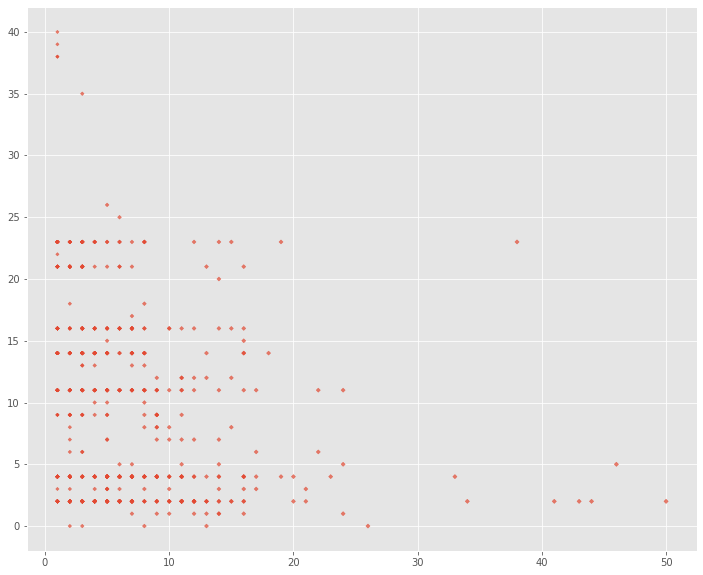

In [26]:
# before that let see correlation between columns
plt.figure(figsize=[12, 10])
plt.scatter(df_['Frequency (times)'], df_['Recency (months)'], s=df_['Monetary (c.c. blood)'], marker='D', alpha=.7)

<Figure size 1008x720 with 0 Axes>

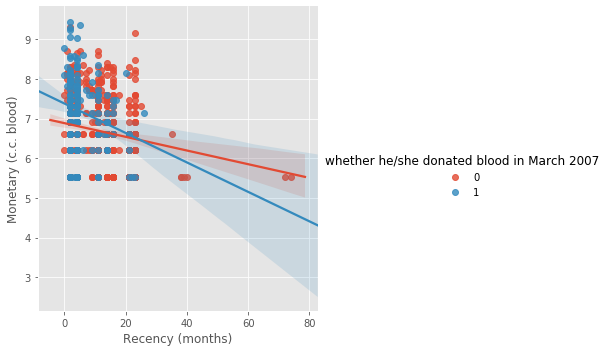

In [27]:
plt.figure(figsize=[14, 10])
sns.lmplot(data=df, x='Recency (months)', y='Monetary (c.c. blood)', scatter=True, fit_reg=True, hue=target)

## Let do Something Beautiful Shall we

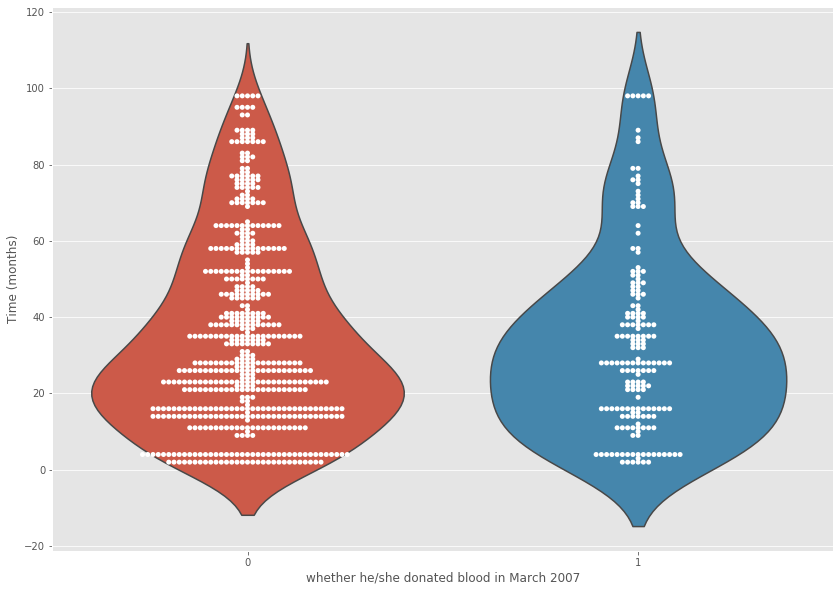

In [28]:
plt.figure(figsize=[14, 10])

sns.swarmplot(data=df_, x=target, y='Time (months)', color='w')
sns.violinplot(data=df_, x=target, y='Time (months)', inner=None)

This Chart Just explain what ViolinPlot is Right

## Who said i can be a grandmaster in EDA  `What... Me Nah`

Okay SO now Preprocessing i mean Model

In [29]:
X = df_.drop(target, axis=1)
y = df_[target]
X.shape

(746, 4)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(596, 4)
(150, 4)
(596,)
(150,)


Now Algorithms let start simple 

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print('Accuracy Score On Train Data: {}'.format(lr.score(X_train, y_train)))
print('Accuracy Score On Test Data: {}'.format(lr.score(X_test, y_test)))

Accuracy Score On Train Data: 0.7936241610738255
Accuracy Score On Test Data: 0.7933333333333333


In [33]:
y_pred = lr.predict(X_test)
print("F1 Score {}".format(f1_score(y_pred, y_test)))
print("Classification Report \n{}".format(classification_report(y_pred, y_test)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_pred, y_test)))

F1 Score 0.2790697674418604
Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       136
           1       0.21      0.43      0.28        14

    accuracy                           0.79       150
   macro avg       0.57      0.63      0.58       150
weighted avg       0.87      0.79      0.82       150

Confusion Matrix 
[[113  23]
 [  8   6]]


The F1 Score is low because the data is imbalanced <br>
you Can Oversample or Undersample using the imblearn library or using nirmal python codes

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=5)
print(scores)

[0.75       0.80833333 0.81512605 0.79831933 0.79661017]


In [35]:
# let try another algorithm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier()
grb = GradientBoostingClassifier()
rf.fit(X_train, y_train)

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
print('Accuracy Score On Train Data: {}'.format(rf.score(X_train, y_train)))
print('Accuracy Score On Test Data: {}'.format(rf.score(X_test, y_test)))

Accuracy Score On Train Data: 0.9060402684563759
Accuracy Score On Test Data: 0.72


In [37]:
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)

[0.7        0.825      0.76470588 0.73109244 0.73728814]


In [38]:
grb.fit(X_train, y_train)
print('Accuracy Score On Train Data: {}'.format(grb.score(X_train, y_train)))
print('Accuracy Score On Test Data: {}'.format(grb.score(X_test, y_test)))

scores = cross_val_score(grb, X_train, y_train, scoring='accuracy', cv=5)
print(scores)

Accuracy Score On Train Data: 0.8389261744966443
Accuracy Score On Test Data: 0.82
[0.7        0.81666667 0.74789916 0.78151261 0.77118644]


## My Test Sc0re with Gradient B00sting is 82%